<a href="https://colab.research.google.com/github/AyeshaAmir55/Assignment-2/blob/main/Copy_of_Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Paper Selection**
I selected the paper "Ensemble Framework for Cardiovascular Disease Prediction" as the foundation for my study. In this research, I will apply the K-Nearest Neighbors (KNN) algorithm and the XGBoost model to the cardiovascular dataset referenced in the paper. My goal is to compare the accuracy of these models in predicting cardiovascular diseases and benchmark their performance against the ensemble framework proposed in the paper. Additionally, I will examine other critical aspects, such as computational efficiency, interpretability, and the impact of feature selection, to provide a detailed comparison of the models and their suitability for cardiovascular disease prediction tasks.

Paper Link: https://jmlr.org/papers/v22/19-325.html

Code Link: https://github.com/wangtongada/HyRS

Dataset Link: https://drive.google.com/uc?id=1cLHnV4i76jY4t5-dvZuXwntO5G3gYnJ0

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
!pip install scikit-learn
from sklearn.impute import KNNImputer
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
import pandas as pd
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix

In [ ]:

data = pd.read_csv('/content/data_cardiovascular_risk.csv')

**Exploratory Data Analysis**

In [ ]:
data.shape

(3390, 17)

In [ ]:
data.head()

,id,age,education,sex,is_smoking,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,0,64,2.0,F,YES,3.0,0.0,0,0,0,221.0,148.0,85.0,NaN,90.0,80.0,1
1,1,36,4.0,M,NO,0.0,0.0,0,1,0,212.0,168.0,98.0,29.77,72.0,75.0,0
2,2,46,1.0,F,YES,10.0,0.0,0,0,0,250.0,116.0,71.0,20.35,88.0,94.0,0
3,3,50,1.0,M,YES,20.0,0.0,0,1,0,233.0,158.0,88.0,28.26,68.0,94.0,1
4,4,64,1.0,F,YES,30.0,0.0,0,0,0,241.0,136.5,85.0,26.42,70.0,77.0,0


In [ ]:

data.describe()

,id,age,education,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
count,3390.000000,3390.000000,3303.000000,3368.000000,3346.000000,3390.000000,3390.000000,3390.000000,3352.000000,3390.00000,3390.000000,3376.000000,3389.000000,3086.000000,3390.000000
mean,1694.500000,49.542183,1.970936,9.069477,0.029886,0.006490,0.315339,0.025664,237.074284,132.60118,82.883038,25.794964,75.977279,82.086520,0.150737
std,978.753033,8.592878,1.019081,11.879078,0.170299,0.080309,0.464719,0.158153,45.247430,22.29203,12.023581,4.115449,11.971868,24.244753,0.357846
min,0.000000,32.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,107.000000,83.50000,48.000000,15.960000,45.000000,40.000000,0.000000
25%,847.250000,42.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,206.000000,117.00000,74.500000,23.020000,68.000000,71.000000,0.000000
50%,1694.500000,49.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,234.000000,128.50000,82.000000,25.380000,75.000000,78.000000,0.000000
75%,2541.750000,56.000000,3.000000,20.000000,0.000000,0.000000,1.000000,0.000000,264.000000,144.00000,90.000000,28.040000,83.000000,87.000000,0.000000
max,3389.000000,70.000000,4.000000,70.000000,1.000000,1.000000,1.000000,1.000000,696.000000,295.00000,142.500000,56.800000,143.000000,394.000000,1.000000


In [ ]:
data.columns

Index(['id', 'age', 'education', 'sex', 'is_smoking', 'cigsPerDay', 'BPMeds',
       'prevalentStroke', 'prevalentHyp', 'diabetes', 'totChol', 'sysBP',
       'diaBP', 'BMI', 'heartRate', 'glucose', 'TenYearCHD'],
      dtype='object')

In [ ]:
data.dtypes

,0
id,int64
age,int64
education,float64
sex,object
is_smoking,object
cigsPerDay,float64
BPMeds,float64
prevalentStroke,int64
prevalentHyp,int64
diabetes,int64


**Univariate Analysis**

<ipython-input-9-cd6e651c99e7>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='TenYearCHD',data=data,palette='rainbow')


<Axes: xlabel='TenYearCHD', ylabel='count'>

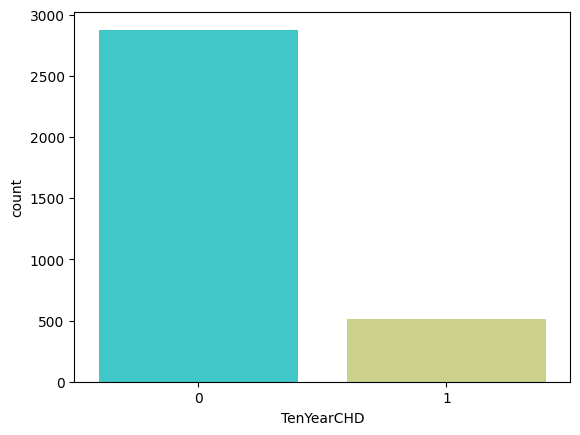

In [ ]:
sns.countplot(x='TenYearCHD',data=data,palette='rainbow')

<Axes: xlabel='TenYearCHD', ylabel='count'>

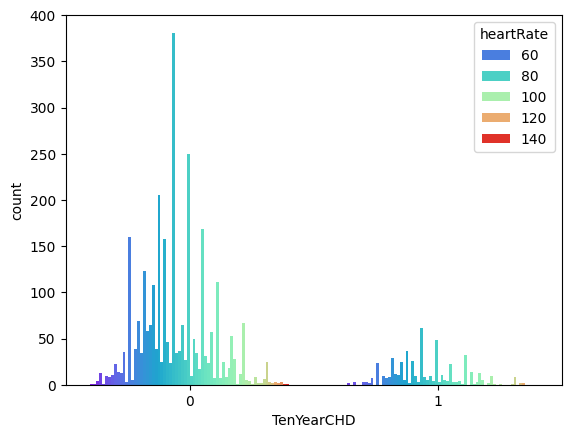

In [ ]:
sns.countplot(x='TenYearCHD',hue='heartRate',data=data,palette='rainbow')

<Axes: xlabel='TenYearCHD', ylabel='count'>

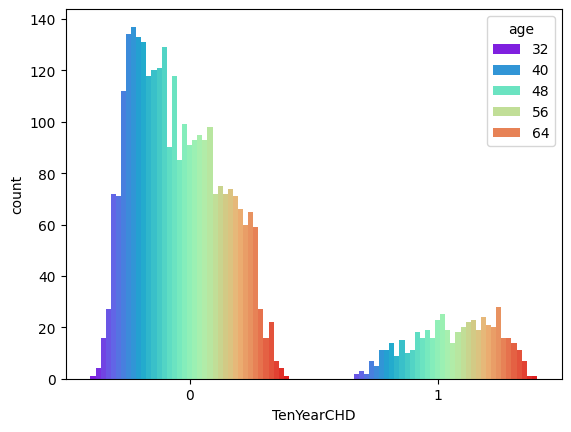

In [ ]:
sns.countplot(x='TenYearCHD',hue='age',data=data,palette='rainbow')

<Axes: ylabel='age'>

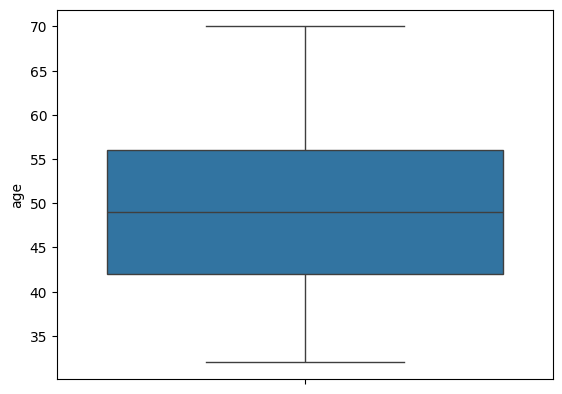

In [ ]:
sns.boxplot(y='age', data=data)

**Bivariate** **Analysis**

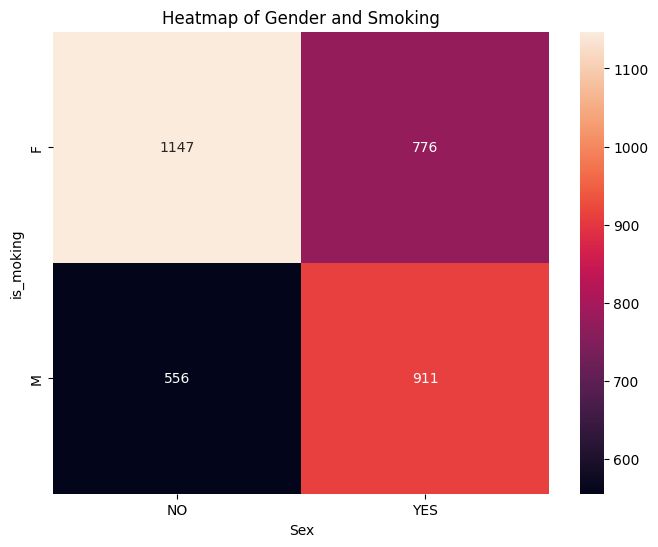

In [ ]:
ct=pd.crosstab(data['sex'], data['is_smoking'])
plt.figure(figsize=(8, 6))
sns.heatmap(ct,annot=True,fmt='d')
plt.title('Heatmap of Gender and Smoking')
plt.xlabel('Sex')
plt.ylabel('is_moking')
plt.show()

<Axes: xlabel='TenYearCHD', ylabel='totChol'>

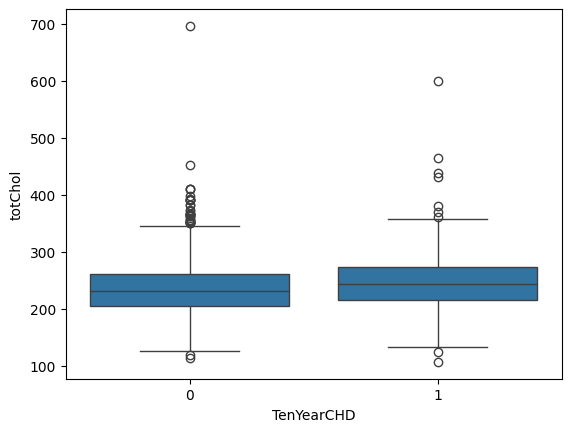

In [ ]:
sns.boxplot(y='totChol', x='TenYearCHD', data=data)

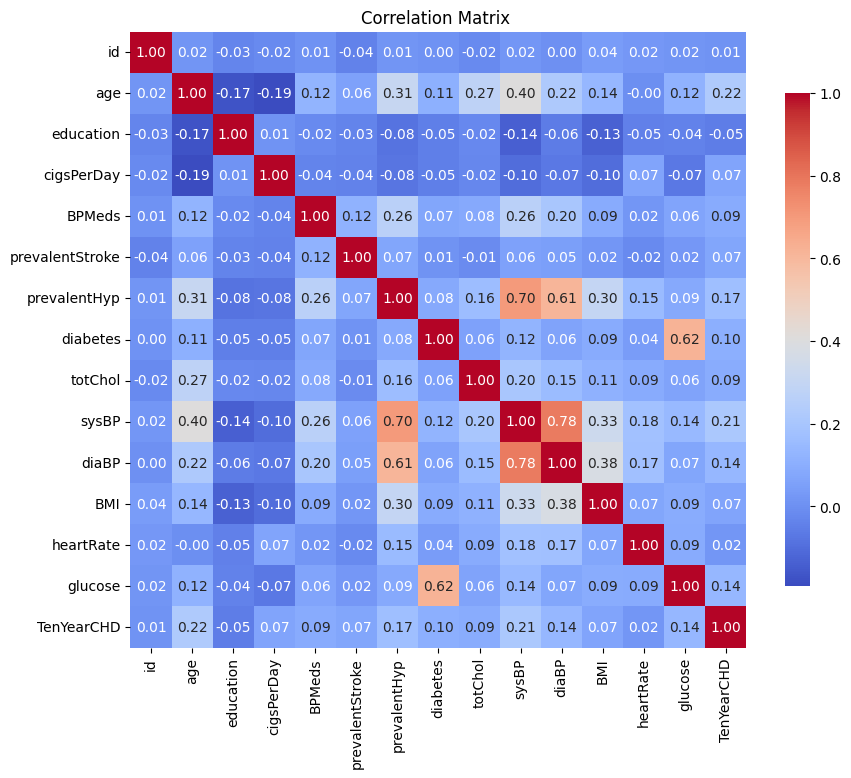

In [ ]:
numerical_features = data.select_dtypes(include=['float64', 'int64'])
correlation_matrix = numerical_features.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', square=True, cbar_kws={"shrink": .8})
plt.title('Correlation Matrix ')
plt.show()

**Multivariate Analysis**

<Axes: xlabel='age', ylabel='heartRate'>

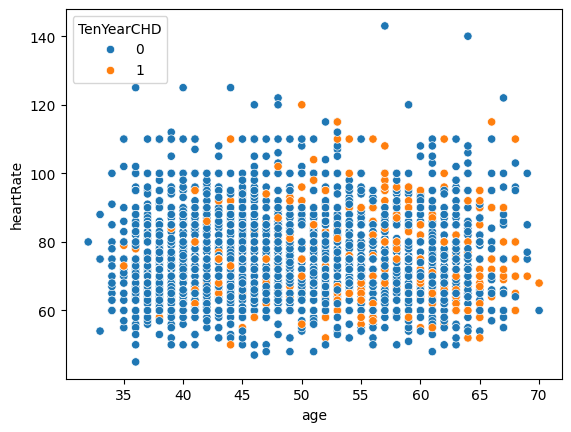

In [ ]:
sns.scatterplot(x='age', y='heartRate', hue='TenYearCHD', data=data)


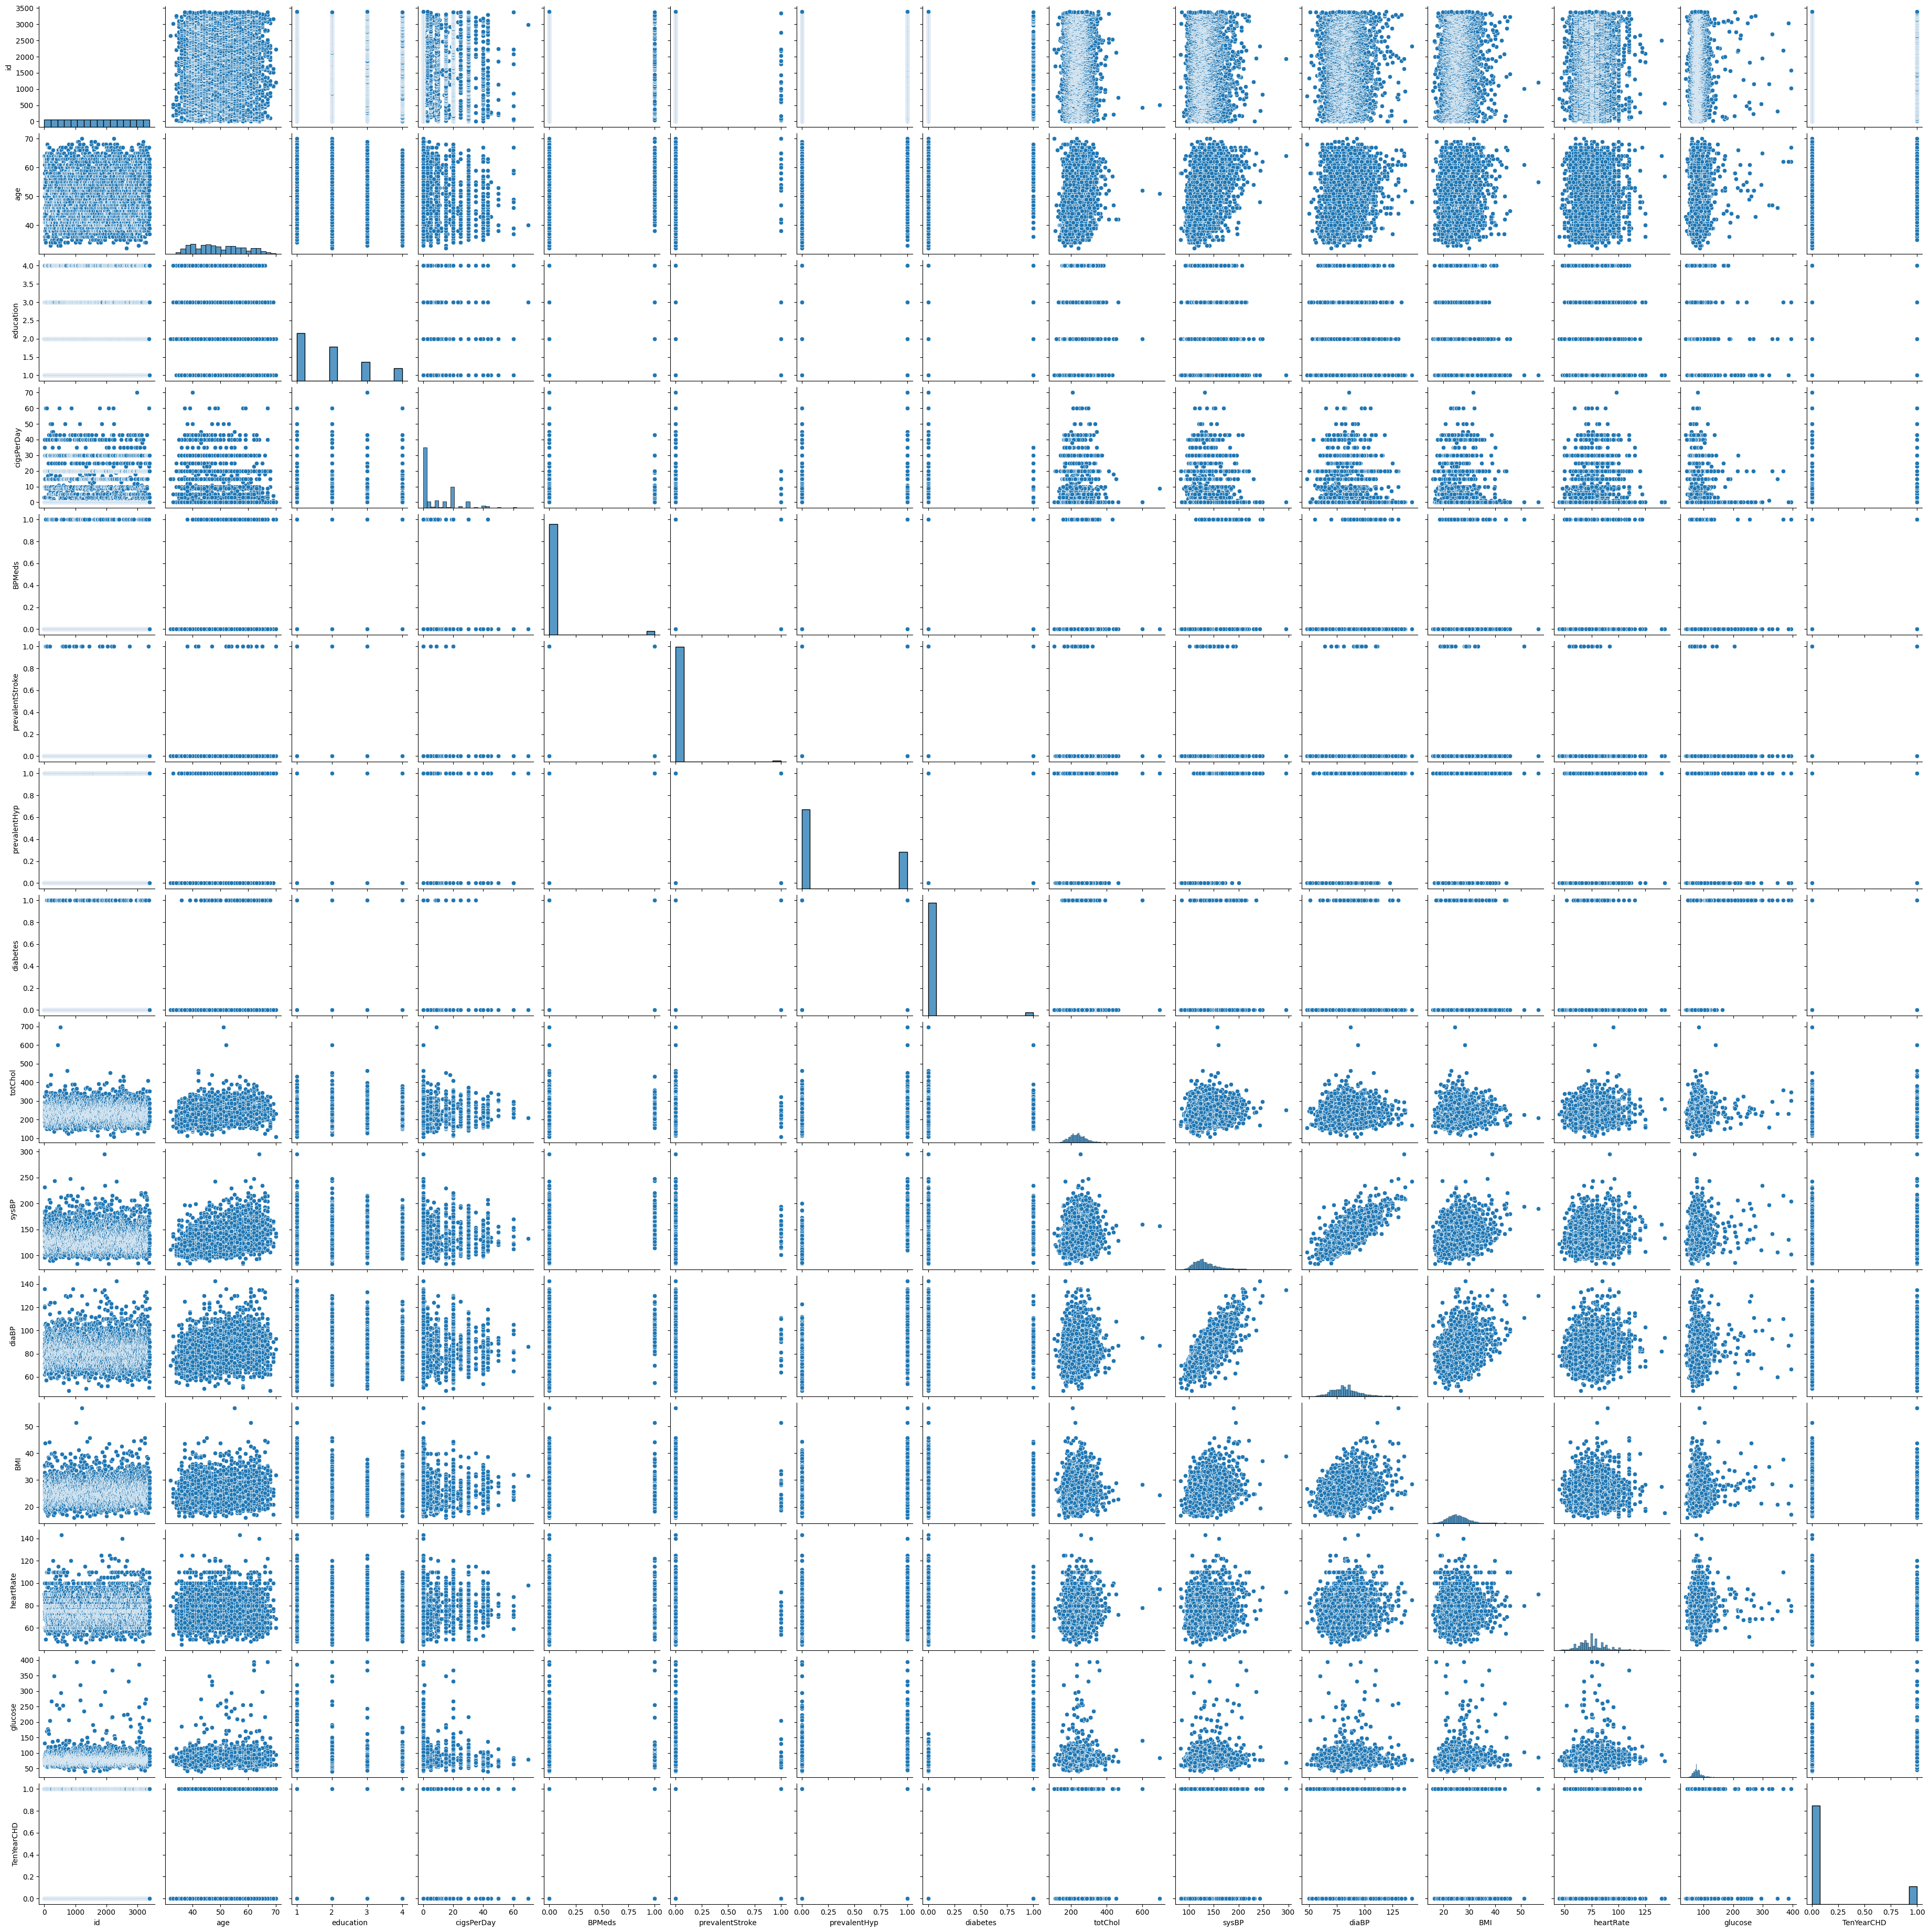

In [ ]:
sns.pairplot(data)

**Data Imputation and Transformation**

In [ ]:
data.drop(columns=['education'], inplace=True)

In [ ]:
data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3390 entries, 0 to 3389
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   age              3390 non-null   int64  
 1   education        3303 non-null   float64
 2   sex              3390 non-null   object 
 3   is_smoking       3390 non-null   object 
 4   cigsPerDay       3368 non-null   float64
 5   BPMeds           3346 non-null   float64
 6   prevalentStroke  3390 non-null   int64  
 7   prevalentHyp     3390 non-null   int64  
 8   diabetes         3390 non-null   int64  
 9   totChol          3352 non-null   float64
 10  sysBP            3390 non-null   float64
 11  diaBP            3390 non-null   float64
 12  BMI              3376 non-null   float64
 13  heartRate        3389 non-null   float64
 14  glucose          3086 non-null   float64
 15  TenYearCHD       3390 non-null   int64  
dtypes: float64(9), int64(5), object(2)
memory usage: 423.9+ KB


In [ ]:

data.isnull().sum()

,0
age,0
education,87
sex,0
is_smoking,0
cigsPerDay,22
BPMeds,44
prevalentStroke,0
prevalentHyp,0
diabetes,0
totChol,38


**We need to impute data in those missing columns and also convert SEX and IS_SMOKING columns to Numerical data **

In [ ]:
# Custom Transformer Class for Imputation
class Imputer(BaseEstimator, TransformerMixin):
    def __init__(self, column, strategy="mean"):
        self.column = column
        self.strategy = strategy

    def fit(self, X, y=None):
        if self.strategy == "mean":
            self.value = X[self.column].mean()
        elif self.strategy == "mode":
            self.value = X[self.column].mode()[0]
        return self

    def transform(self, X, y=None):
        X = X.copy()
        X[self.column] = X[self.column].fillna(self.value)
        return X

# Build the full pipeline
def create_pipeline():
    # Imputation for specific columns
    imputation_pipeline = Pipeline(steps=[
        ('impute_glucose', Imputer(column='glucose', strategy="mean")),
        ('impute_education', Imputer(column='education', strategy="mode")),
        ('impute_BPMeds', Imputer(column='BPMeds', strategy="mode")),
        ('impute_totChol', Imputer(column='totChol', strategy="mean")),
        ('impute_cigsPerDay', Imputer(column='cigsPerDay', strategy="mean")),
        ('impute_BMI', Imputer(column='BMI', strategy="mean")),
        ('impute_heartRate', Imputer(column='heartRate', strategy="mean"))
    ])

    # One-hot encoding for `sex` and `is_smoking`
    categorical_transformer = ColumnTransformer(
        transformers=[
            ('sex_encoder', OneHotEncoder(drop='first', sparse_output=False), ['sex']),  # Binary encoding: F -> 0, M -> 1
            ('is_smoking_encoder', OneHotEncoder(drop='first', sparse_output=False), ['is_smoking'])  # Binary encoding: No -> 0, Yes -> 1
        ],
        remainder='passthrough'  # Pass through the rest of the columns unchanged
    )

    # Combine imputation and encoding into a single pipeline
    full_pipeline = Pipeline(steps=[
        ('imputations', imputation_pipeline),
        ('categorical_encoding', categorical_transformer)
    ])

    return full_pipeline

# Apply the pipeline directly on the dataset
pipeline = create_pipeline()

# Ensure the pipeline works directly on 'data'
data_transformed = pipeline.fit_transform(data)

# Create column names for the transformed data
categorical_columns = ['sex_encoded', 'is_smoking_encoded']
numeric_columns = list(data.drop(columns=['sex', 'is_smoking']).columns)
column_names = categorical_columns + numeric_columns

# Convert back to DataFrame
data_transformed_df = pd.DataFrame(data_transformed, columns=column_names)


In [ ]:
data_transformed_df.isnull().sum()

,0
sex_encoded,0
is_smoking_encoded,0
age,0
education,0
cigsPerDay,0
BPMeds,0
prevalentStroke,0
prevalentHyp,0
diabetes,0
totChol,0


In [ ]:
data_transformed_df.head()

,sex_encoded,is_smoking_encoded,age,education,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,0.0,1.0,64.0,2.0,3.0,0.0,0.0,0.0,0.0,221.0,148.0,85.0,25.794964,90.0,80.0,1.0
1,1.0,0.0,36.0,4.0,0.0,0.0,0.0,1.0,0.0,212.0,168.0,98.0,29.770000,72.0,75.0,0.0
2,0.0,1.0,46.0,1.0,10.0,0.0,0.0,0.0,0.0,250.0,116.0,71.0,20.350000,88.0,94.0,0.0
3,1.0,1.0,50.0,1.0,20.0,0.0,0.0,1.0,0.0,233.0,158.0,88.0,28.260000,68.0,94.0,1.0
4,0.0,1.0,64.0,1.0,30.0,0.0,0.0,0.0,0.0,241.0,136.5,85.0,26.420000,70.0,77.0,0.0


In [ ]:
data_transformed_df.dtypes

,0
sex_encoded,float64
is_smoking_encoded,float64
age,float64
education,float64
cigsPerDay,float64
BPMeds,float64
prevalentStroke,float64
prevalentHyp,float64
diabetes,float64
totChol,float64


**XGBoost Classifier**

In [ ]:
from xgboost import XGBClassifier

# XGBoost Classifier
xgb_model = XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)
xgb_model.fit(X_train, y_train.ravel())
y_pred_xgb = xgb_model.predict(X_test)

# Evaluate XGBoost
accuracy = accuracy_score(y_test, y_pred_xgb)
precision = precision_score(y_test, y_pred_xgb, average='binary')
recall = recall_score(y_test, y_pred_xgb, average='binary')
f1 = f1_score(y_test, y_pred_xgb, average='binary')

print("\nXGBoost Classifier:")
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_xgb))


<ipython-input-32-8a3abbe9b9ff>:5: FutureWarning: Series.ravel is deprecated. The underlying array is already 1D, so ravel is not necessary.  Use `to_numpy()` for conversion to a numpy array instead.
  xgb_model.fit(X_train, y_train.ravel())
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [13:38:09] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)



XGBoost Classifier:
Accuracy: 0.8451
Precision: 0.4000
Recall: 0.1649
F1 Score: 0.2336
Confusion Matrix:
[[557  24]
 [ 81  16]]


**ML Model Implementation uisng KNN**

In [ ]:
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, f1_score

# Step 1: Define Features (X) and Target (y)
# The CV_Disease column is likely still present in data_transformed_df
X = data_transformed_df[['age', 'education', 'sex_encoded', 'is_smoking_encoded', 'cigsPerDay', 'BPMeds',
                         'prevalentStroke', 'prevalentHyp', 'diabetes', 'totChol', 'sysBP', 'diaBP', 'BMI', 'heartRate', 'glucose']]
y = data_transformed_df['TenYearCHD']  # Access the target column directly by name, not as a list

# Step 2: Split the Data into Training and Testing Sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 3: Train the KNN Model
knn = KNeighborsClassifier(n_neighbors=5)  # You can tune n_neighbors
knn.fit(X_train, y_train.ravel()) # Convert y_train to 1D array

# Step 4: Make Predictions
y_pred = knn.predict(X_test)

# Step 5: Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='binary')
recall = recall_score(y_test, y_pred, average='binary')
f1 = f1_score(y_test, y_pred, average='binary')

print(f"\nModel Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")

# Step 6: Confusion Matrix
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))


Model Accuracy: 0.8510
Precision: 0.4231
Recall: 0.1134
F1 Score: 0.1789

Confusion Matrix:
[[566  15]
 [ 86  11]]


<ipython-input-31-72e43d7fc128>:14: FutureWarning: Series.ravel is deprecated. The underlying array is already 1D, so ravel is not necessary.  Use `to_numpy()` for conversion to a numpy array instead.
  knn.fit(X_train, y_train.ravel()) # Convert y_train to 1D array


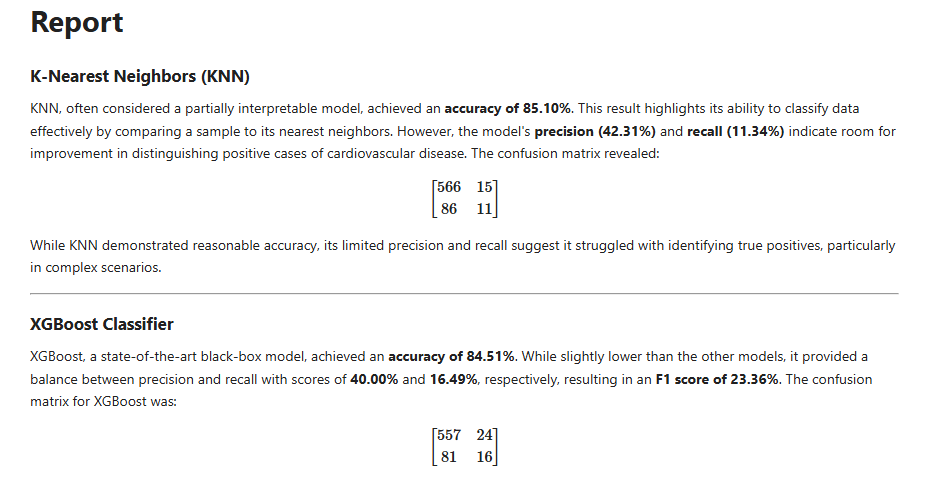